In [215]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [217]:
df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [218]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [219]:
df["classification"].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [220]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

In [221]:
df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

In [222]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

In [223]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [224]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [225]:
col = ['rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
encoder = LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [226]:
df[['appet', 'classification']] = df[['appet', 'classification']].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})

In [227]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                 int32
dm                  int32
cad                 int32
appet              object
pe                  int32
ane                 int32
classification     object
dtype: object

In [228]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [229]:
X=df[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]
y=df['classification']

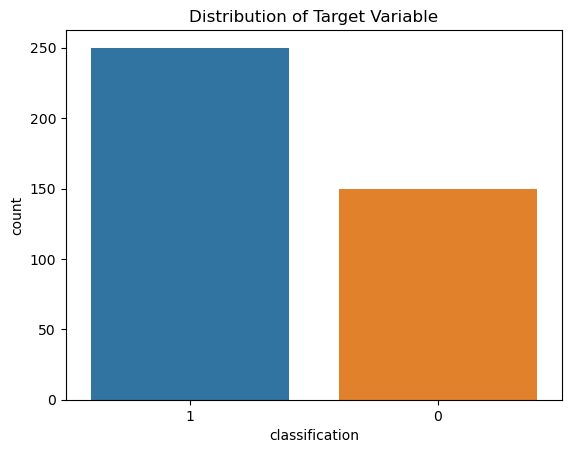

In [230]:
# Distribution of target variable before class balance
sns.countplot(x='classification', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Fill the missing values using KNN

In [231]:
import pandas as pd
from sklearn.impute import KNNImputer
X = df.drop(columns=["classification"])  # Drop the target column if it exists
y = df["classification"]  # Replace "target_column" with the name of your target column
knn_imputer = KNNImputer(n_neighbors=10)  # You can adjust the number of neighbors as needed
X_imputed = knn_imputer.fit_transform(X)

# Convert back to DataFrame (if needed)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


In [232]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed_df, y)
print("SMOTE:")
print(sorted(Counter(y_smote).items()))


SMOTE:
[('0', 250), ('1', 250)]


In [233]:
X_smote.shape

(500, 25)

In [234]:
X_smote.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [235]:
y_smote.isnull().sum()

0

In [236]:
merged_df = pd.concat([X_smote, y_smote], axis=1)

In [237]:
merged_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [238]:
X=merged_df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]
y=merged_df['classification']

In [239]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
merged_df.corr()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.189393,-0.268310,0.701850,-0.609163,-0.323838,-0.234474,0.129527,-0.167652,-0.024767,-0.403430,-0.362969,-0.311478,0.396307,-0.078279,0.692445,0.670184,-0.254543,0.653651,-0.538637,-0.495801,-0.177538,0.419825,-0.338250,-0.295395,-0.859644
age,-0.189393,1.000000,0.167888,-0.215443,0.141076,0.220277,0.133861,0.027433,0.077596,-0.023571,0.221558,0.200441,0.135649,-0.090982,0.061203,-0.190816,-0.227232,0.102556,-0.227941,0.382007,0.354241,0.213120,-0.169037,0.128596,0.091082,0.239057
bp,-0.268310,0.167888,1.000000,-0.237569,0.194514,0.217146,0.032629,-0.085082,0.015475,0.028451,0.187403,0.209220,0.164409,-0.119531,0.072400,-0.284561,-0.300360,0.042186,-0.254557,0.257861,0.216708,0.042840,-0.198362,0.058011,0.178551,0.310078
sg,0.701850,-0.215443,-0.237569,1.000000,-0.543378,-0.340814,-0.192301,0.126397,-0.199299,-0.112184,-0.404088,-0.376151,-0.313448,0.351131,-0.057843,0.649925,0.628049,-0.243093,0.601691,-0.440639,-0.454429,-0.129501,0.324836,-0.326774,-0.264544,-0.780055
al,-0.609163,0.141076,0.194514,-0.543378,1.000000,0.312202,-0.106326,-0.295503,0.252981,0.171494,0.394269,0.483680,0.315281,-0.361890,0.114037,-0.635776,-0.610051,0.246090,-0.555308,0.523020,0.431946,0.209492,-0.396753,0.451544,0.328259,0.681661
su,-0.323838,0.220277,0.217146,-0.340814,0.312202,1.000000,0.089059,-0.081511,0.099954,0.042043,0.684927,0.188337,0.162368,-0.125086,0.185500,-0.263042,-0.264776,0.169112,-0.257705,0.316278,0.483487,0.202390,-0.111576,0.142914,0.091595,0.382269
rbc,-0.234474,0.133861,0.032629,-0.192301,-0.106326,0.089059,1.000000,0.430851,-0.045474,-0.090829,0.057711,-0.089243,0.000211,-0.049564,-0.024340,-0.120046,-0.097889,0.008051,-0.111558,0.138532,0.157405,-0.001743,-0.041493,-0.025417,0.027623,0.266984
pc,0.129527,0.027433,-0.085082,0.126397,-0.295503,-0.081511,0.430851,1.000000,-0.284177,-0.126120,-0.168031,-0.148891,0.006280,0.078340,-0.122640,0.159858,0.165741,-0.054280,0.158002,-0.085442,0.008611,-0.073038,0.174064,-0.194487,-0.115598,-0.134430
pcc,-0.167652,0.077596,0.015475,-0.199299,0.252981,0.099954,-0.045474,-0.284177,1.000000,0.616979,0.130786,0.116311,0.023752,-0.103316,-0.002842,-0.184609,-0.157947,0.124033,-0.125242,0.108283,0.088036,0.101945,-0.127989,0.057020,0.110097,0.144437
ba,-0.024767,-0.023571,0.028451,-0.112184,0.171494,0.042043,-0.090829,-0.126120,0.616979,1.000000,0.024857,0.062582,0.005298,-0.015256,-0.009956,-0.089779,-0.047621,0.051829,-0.011007,0.003237,-0.000004,0.064770,-0.065369,0.051486,0.002990,0.037290


In [240]:
X.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

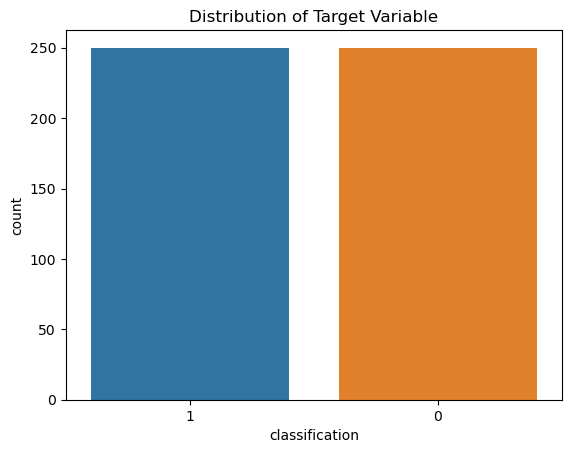

In [241]:
# Distribution of target variable
sns.countplot(x='classification', data=merged_df)
plt.title('Distribution of Target Variable')
plt.show()

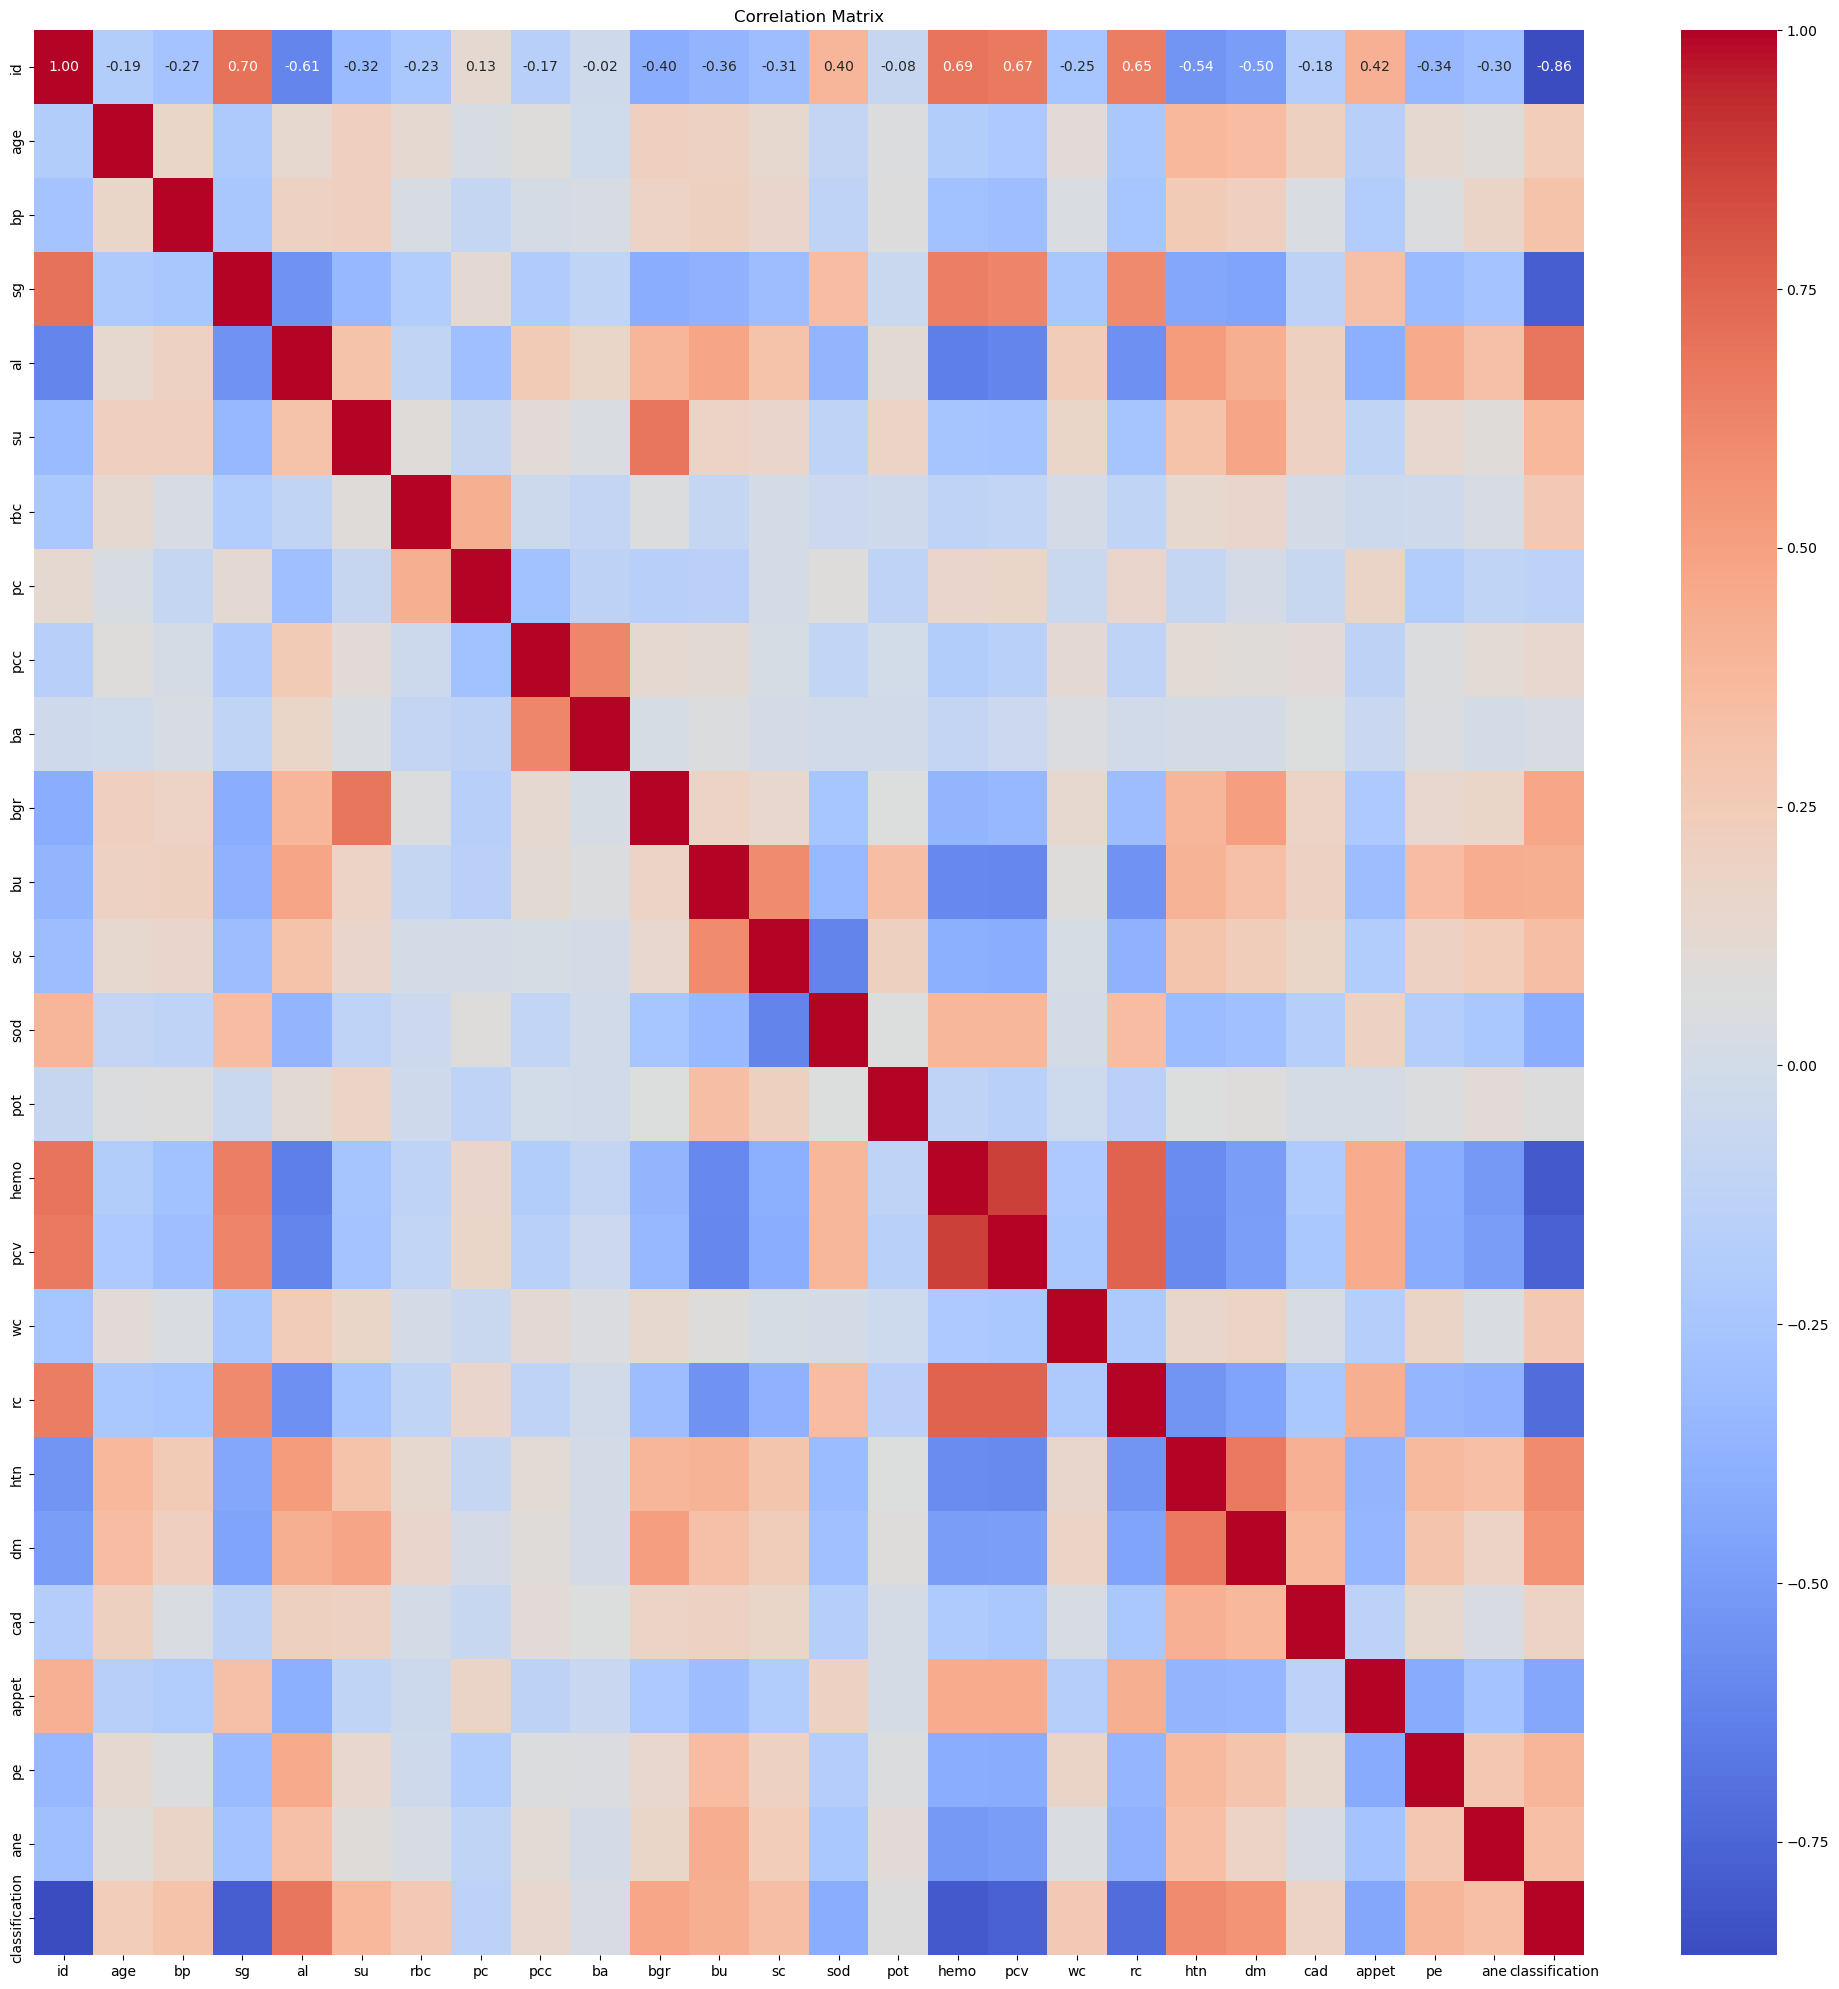

In [242]:
# Correlation matrix
plt.figure(figsize=(25,25))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model with specified hyperparameters
model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=40
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)*100

print("Accuracy: ",accuracy)
print("Classification Report\n",classification_report(y_test,y_pred))

# Print t

Accuracy:  98.0
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        46

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [244]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Example: df = pd.read_csv('your_dataset.csv')

# Create an SVM model with specified hyperparameters
model = SVC(
    C=0.0006,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.1,
    cache_size=100,
    max_iter=-1,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)*100

# Print the results
print("Accuracy:", accuracy)
print("Classification Report\n", classification_report(y_test, y_pred))
#linear-overfit
#sigmoid and poly-gives very low accuracy
#So boosting is applied for rbf

Accuracy: 96.0
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.98      0.93      0.96        46

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [245]:
model = DecisionTreeClassifier(
    criterion='gini',   # Criterion for splitting: 'gini' or 'entropy'
    max_depth=2,           # Maximum depth of the tree
    min_samples_split=2,
    max_features="auto",# Minimum number of samples required to split an internal node   # Number of features to consider when looking for the best split
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)*100

print(accuracy)
print("Classification Report\n", classification_report(y_test, y_pred))

95.0
Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.89      0.94        46

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [246]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 95.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.94      0.96      0.95        46

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [247]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions on the test set for Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 94.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.93      0.93      0.93        46

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



ANN

ANN model

In [248]:
X_train.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [249]:
model=Sequential()
model.add(Dense(24, activation='relu',input_dim= X_train.shape[1]))
model.add(Dense(48, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [250]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 48)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,849 (7.22 KB)

 Trainable params: 1,849 (7.22 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [252]:

y_test= y_test.astype(float)
y_test.dtypes
y_train= y_train.astype(float)
y_train.dtypes

dtype('float64')

In [253]:
history = model.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=.1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4821 - loss: 51.2273 - val_accuracy: 0.5000 - val_loss: 3.5019
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 7.6853 - val_accuracy: 0.7500 - val_loss: 2.5909
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 12.6756 - val_accuracy: 0.6250 - val_loss: 6.7216
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5709 - loss: 7.5347 - val_accuracy: 0.4750 - val_loss: 3.7085
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 7.4235 - val_accuracy: 0.7500 - val_loss: 2.8376
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5438 - loss: 5.1081 - val_accuracy: 0.5250 - val_loss: 2.3716
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - loss: 3.1692 - val_accuracy: 0.7250 - val_loss: 4.1949
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5841 - loss: 6.9957 - val_accuracy: 0.8000 - val_lo

In [254]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
# Generate classification report
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        54
         1.0       1.00      0.74      0.85        46

    accuracy                           0.88       100
   macro avg       0.91      0.87      0.88       100
weighted avg       0.90      0.88      0.88       100



In [255]:
import matplotlib.pyplot as plt
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


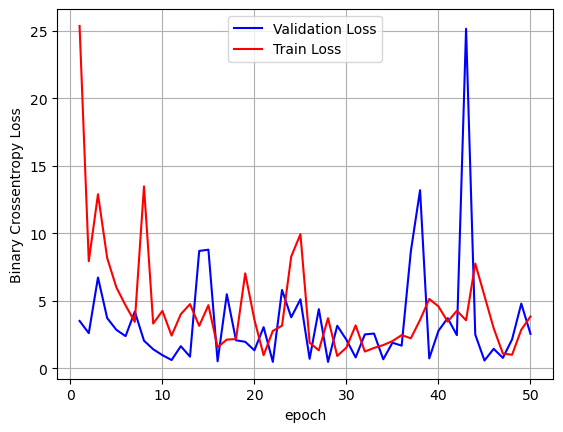

In [256]:
import matplotlib.pyplot as plt

# Assuming `history` is your history object containing loss values
# and `plt_dynamic` is a custom function to plot dynamic plots
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Binary Crossentropy Loss')

# Assuming `history` is your history object containing loss values
print(history.history.keys())

# Ensure that the lengths of x, vy, and ty match
x = list(range(1, len(history.history['val_loss']) + 1))

vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


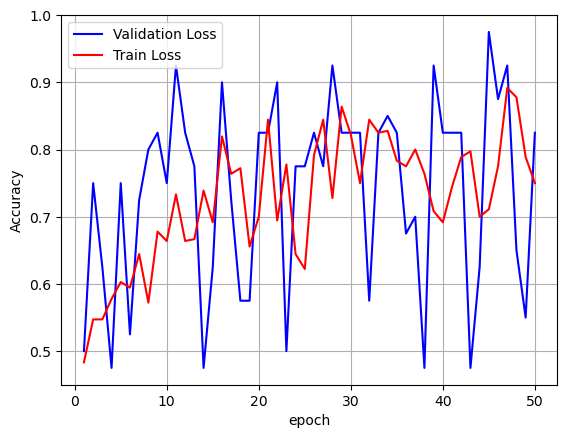

In [257]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')

x = list(range(1,50+1))

print(history.history.keys())

vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)

RFECV 

In [258]:
#RandomForestClassifier with RFECV
from sklearn.feature_selection import RFECV

model = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=None
)
rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy') 
# Train the model
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

# Transform the data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model using only selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Make predictions on the test set

Accuracy: 99.0
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        54
         1.0       1.00      0.98      0.99        46

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [259]:
#DecisionTreeClassifier with RFECV

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
model_dt = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=2, 
    min_samples_split=2, 
    max_features="auto",
    random_state=42
)

# Initialize RFECV for feature selection
rfecv_dt = RFECV(estimator=model_dt, step=1, cv=10, scoring='accuracy')

# Train the RFECV
rfecv_dt.fit(X_train, y_train)

# Get selected features
selected_features_dt = X_train.columns[rfecv_dt.support_]

# Transform the data to include only the selected features
X_train_selected_dt = X_train[selected_features_dt]
X_test_selected_dt = X_test[selected_features_dt]

# Train the Decision Tree model using only selected features
model_dt.fit(X_train_selected_dt, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_selected_dt)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 97.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        54
         1.0       1.00      0.93      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [260]:
#SVM WITH RFECV

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import pandas as pd


# Split the dataset into training and testing sets

# Create an SVM model with specified hyperparameters
model = SVC(
    C=0.0006,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.1,
    cache_size=100,
    max_iter=-1,
    random_state=42
)

# Initialize RFECV with SVM as the estimator and 'accuracy' as the scoring metric
rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')

# Fit RFECV to training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Select only the relevant features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model using selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy*100)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 96.0
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        54
         1.0       1.00      0.93      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [261]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Initialize RFECV with Logistic Regression as the estimator and 'accuracy' as the scoring metric
rfecv_logistic = RFECV(estimator=logistic_model, step=1, cv=10, scoring='accuracy')

# Fit RFECV to training data
rfecv_logistic.fit(X_train, y_train)

# Get selected features
selected_features_logistic = X_train.columns[rfecv_logistic.support_]

# Select only the relevant features
X_train_selected_logistic = X_train[selected_features_logistic]
X_test_selected_logistic = X_test[selected_features_logistic]

# Train the Logistic Regression model using only selected features
logistic_model.fit(X_train_selected_logistic, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_selected_logistic)

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100

print("Logistic Regression Accuracy with RFECV:", accuracy_logistic)
print("Logistic Regression Classification Report with RFECV:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy with RFECV: 99.0
Logistic Regression Classification Report with RFECV:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        54
         1.0       1.00      0.98      0.99        46

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [262]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Initialize SelectKBest with chi2 scoring function
select_k_best = SelectKBest(chi2)

# Fit SelectKBest to training data
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# Transform test data using SelectKBest
X_test_selected = select_k_best.transform(X_test)

# Train the Naive Bayes model using only selected features
nb_model.fit(X_train_selected, y_train)

# Make predictions on the test set for Naive Bayes
y_pred_nb = nb_model.predict(X_test_selected)

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100

print("Naive Bayes Accuracy with SelectKBest:", accuracy_nb)
print("Naive Bayes Classification Report with SelectKBest:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy with SelectKBest: 96.0
Naive Bayes Classification Report with SelectKBest:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        54
         1.0       1.00      0.91      0.95        46

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



UFS

In [263]:
#DecisionTreeClassifier with UFS

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
model_dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=2, 
    min_samples_split=4,  # Adjusted min_samples_split
    max_features="auto",# Adjusted min_samples_leaf
    random_state=42
)
#min_samples_leaf=2,
# Initialize SelectKBest with f_classif
ufs = SelectKBest(score_func=f_classif, k=5)  # Specify the number of features you want to select

# Fit UFS to the data
ufs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[ufs.get_support()]

# Transform the data to include only the selected features
X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

# Train the Decision Tree model using only selected features
model_dt.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_selected)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 97.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        54
         1.0       0.98      0.96      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [264]:
#SVM with UFS

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM classifier
svm_model = SVC(
    C=0.0006,
    kernel='linear',
    degree=2,
    gamma='scale',
    probability=False,
    tol=0.001,
    cache_size=200,
    max_iter=-1,
    random_state=42
)

# Initialize SelectKBest with f_classif
ufs = SelectKBest(score_func=f_classif, k=5)  # Specify the number of features you want to select

# Fit UFS to the data
ufs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[ufs.get_support()]

# Transform the data to include only the selected features
X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

# Train the SVM model using only selected features
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_selected)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 95.0
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        54
         1.0       1.00      0.89      0.94        46

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
model_rf = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42,
    max_samples=40
)
# Initialize SelectKBest with f_classif
ufs = SelectKBest(score_func=f_classif, k=5)  # Specify the number of features you want to select

# Fit UFS to the data
ufs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[ufs.get_support()]

# Transform the data to include only the selected features
X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

# Train the Decision Tree model using only selected features
model_rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = model_dt.predict(X_test_selected)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_dt) * 100

print("Random Forest Accuracy:", accuracy_rf)
print( "RandomForest:\n",classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 97.0
RandomForest:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        54
         1.0       0.98      0.96      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [266]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize SelectKBest with f_classif
ufs = SelectKBest(score_func=f_classif, k=5)  # Specify the number of features you want to select

# Fit UFS to the data
ufs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[ufs.get_support()]

# Transform the data to include only the selected features
X_train_selected = ufs.transform(X_train)
X_test_selected = ufs.transform(X_test)

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Train the Logistic Regression model using only selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_selected)

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100

print("Logistic Regression Accuracy with UFS:", accuracy_logistic)
print("Logistic Regression Classification Report with UFS:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy with UFS: 96.0
Logistic Regression Classification Report with UFS:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        54
         1.0       0.98      0.93      0.96        46

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [267]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Initialize SelectKBest with f_classif
ufs = SelectKBest(score_func=f_classif, k=5)  # Specify the number of features you want to select

# Fit UFS to the data
ufs.fit(X_train, y_train)

# Get selected features
selected_features_nb = X_train.columns[ufs.get_support()]

# Transform the data to include only the selected features
X_train_selected_nb = ufs.transform(X_train)
X_test_selected_nb = ufs.transform(X_test)

# Train the Naive Bayes model using only selected features
nb_model.fit(X_train_selected_nb, y_train)

# Make predictions on the test set for Naive Bayes
y_pred_nb = nb_model.predict(X_test_selected_nb)

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100

print("Naive Bayes Accuracy with SelectKBest:", accuracy_nb)
print("Naive Bayes Classification Report with SelectKBest:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy with SelectKBest: 95.0
Naive Bayes Classification Report with SelectKBest:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        54
         1.0       0.96      0.93      0.95        46

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



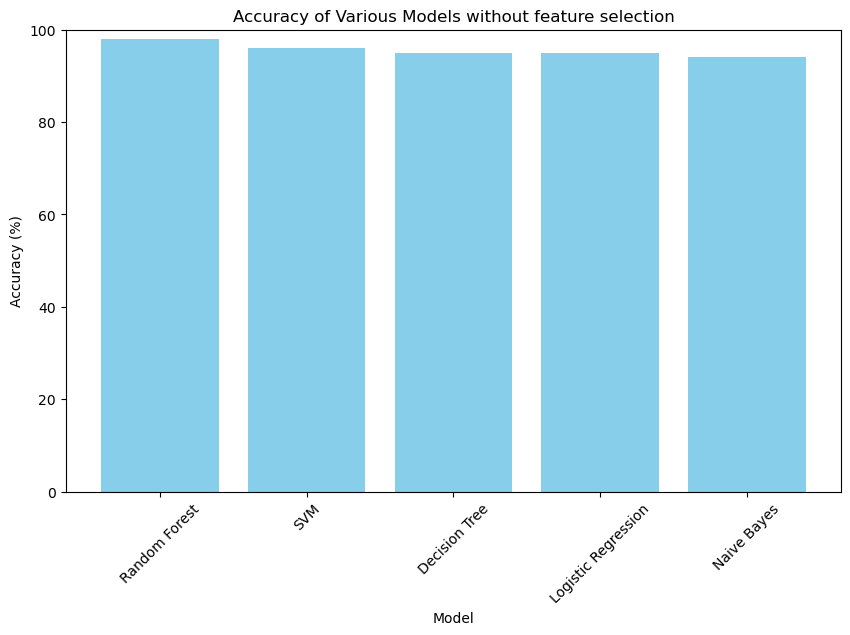

In [273]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'SVM','Decision Tree','Logistic Regression','Naive Bayes']

# List of accuracies for each model
accuracies = [98,96,95,95,94]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Various Models without feature selection')
plt.ylim(0, 100)  # Setting y-axis limit to ensure proper visualization of accuracy values
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


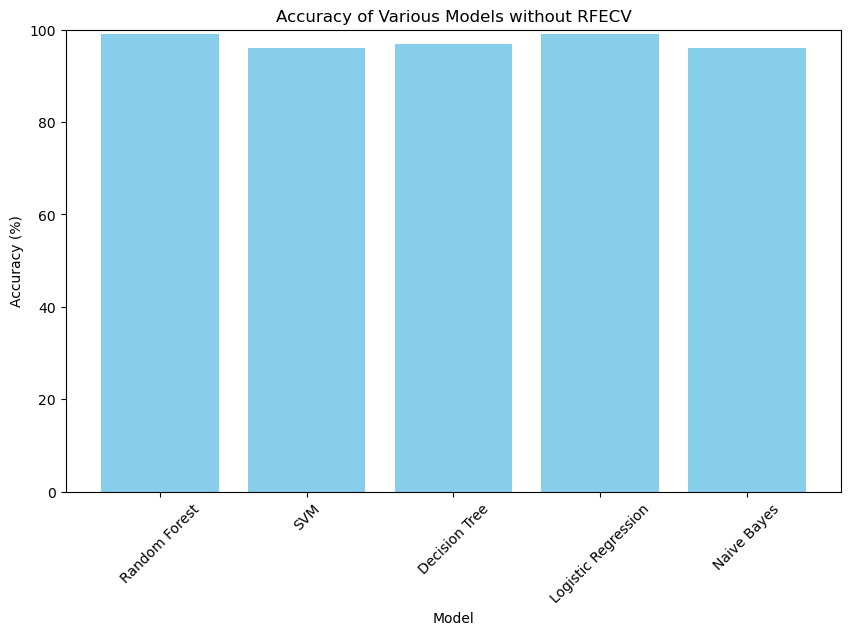

In [280]:
model_names = ['Random Forest', 'SVM','Decision Tree','Logistic Regression','Naive Bayes']

# List of accuracies for each model
accuracies = [99,96,97,99,96]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Various Models without RFECV')
plt.ylim(0, 100)  # Setting y-axis limit to ensure proper visualization of accuracy values
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

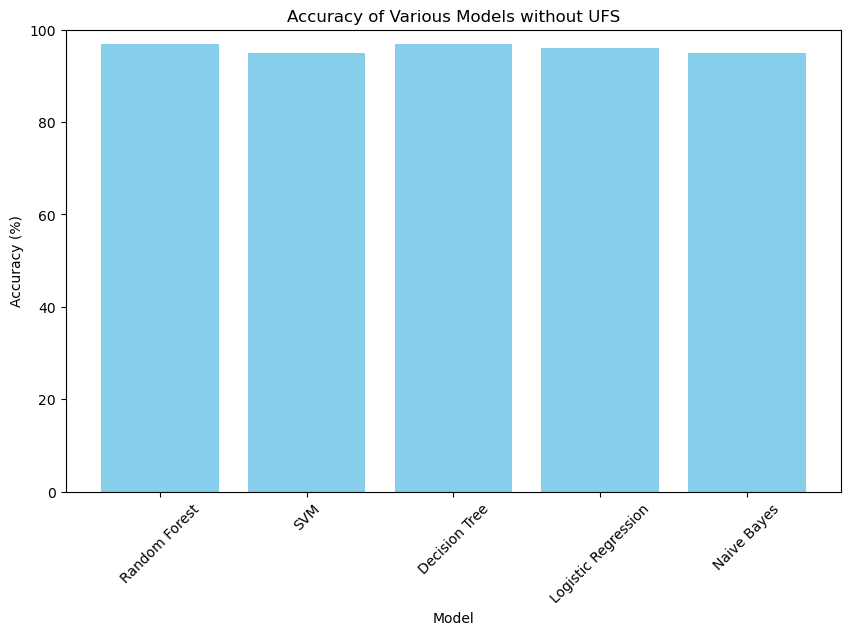

In [281]:
model_names = ['Random Forest', 'SVM','Decision Tree','Logistic Regression','Naive Bayes']

# List of accuracies for each model
accuracies = [97,95,97,96,95]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Various Models without UFS')
plt.ylim(0, 100)  # Setting y-axis limit to ensure proper visualization of accuracy values
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()